In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Pratham\Downloads\Dataset_1 - Sheet1.csv")
X = df[['House Area', 'Number of rooms']].values
y = df['Price'].values 
# Ensure numeric stability
X = X.astype(np.float64)
y = y.astype(np.float64).reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias column
X = np.c_[np.ones((X.shape[0], 1)), X]

df=df.rename(columns={'House Area':'area','Number of rooms':'rooms','Price':'house_price'})
print(df.head())


   House ID  area  rooms  house_price
0         1  6274      8         2100
1         2  6689      5         2200
2         3  4276      8         1400
3         4  5130      9         1700
4         5  6035      6         2000


In [33]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((X, ones))
print(X)

[[ 1.          0.73531573  0.78299363  1.        ]
 [ 1.          1.03585102 -0.46979618  1.        ]
 [ 1.         -0.71159878  0.78299363  1.        ]
 [ 1.         -0.09314784  1.20059023  1.        ]
 [ 1.          0.56223636 -0.05219958  1.        ]
 [ 1.         -1.67476009 -2.14018258  1.        ]
 [ 1.         -0.38499296  1.61818683  1.        ]
 [ 1.          1.16910041  0.36539703  1.        ]
 [ 1.         -0.97592501 -0.88739278  1.        ]
 [ 1.          0.31166959 -0.46979618  1.        ]
 [ 1.          0.14510786 -0.46979618  1.        ]
 [ 1.         -0.54358869 -0.88739278  1.        ]
 [ 1.         -1.20911143  0.78299363  1.        ]
 [ 1.          1.41459791 -1.30498938  1.        ]
 [ 1.          1.58984982  1.20059023  1.        ]
 [ 1.         -1.37060389 -0.05219958  1.        ]]


In [35]:
weights = np.zeros((X.shape[1],1))
learning_rate = 0.001
epochs = 3000

In [36]:
def predict(X, weights):

    return X@weights

In [37]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [38]:
losses = []

for i in range(epochs):
    y_pred = X @ weights
    error = y_pred - y

    gradient = (2 / len(y)) * (X.T @ error)
    weights -= learning_rate * gradient

    loss = np.mean(error ** 2)
    losses.append(loss)

    if np.isnan(loss) or np.isinf(loss):
        print("Diverged at epoch", i)
        break

In [39]:
print("Weights:", weights)
print(f"Price = {weights[0][0]} + {weights[1][0]}*Area + {weights[2][0]}*Rooms")


Weights: [[874.99475164]
 [458.31183904]
 [  3.78085061]
 [874.99475164]]
Price = 874.9947516435375 + 458.3118390404422*Area + 3.7808506066113385*Rooms


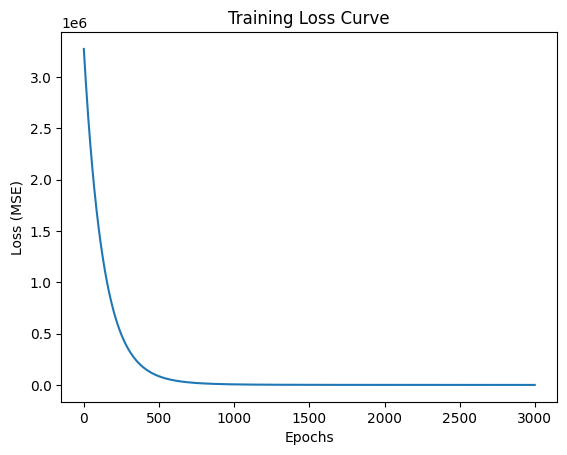

In [40]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.show()


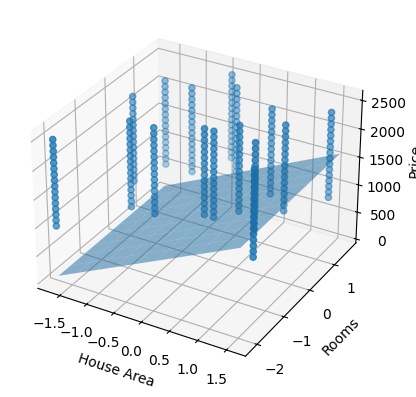

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y, label='Actual Data')

area_range = np.linspace(X[:,1].min(), X[:,1].max(), 10)
rooms_range = np.linspace(X[:,2].min(), X[:,2].max(), 10)

A, R = np.meshgrid(area_range, rooms_range)

Z = weights[0] + weights[1]*A + weights[2]*R

ax.plot_surface(A, R, Z, alpha=0.5)

ax.set_xlabel('House Area')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')

plt.show()